# Starbucks Location Scoring System
***
## Machine Learning I - Project 

*Authors:*  
**Amulya Jayanti** 	  | *EDA, Model Development*  
**Angus Ho** 		      | *Data Preparation, Clustering*  
**Ankit Agrawal** 	      | *Clustering, Tool Development*  
**Halleluya Mengesha**   | *Model Development, Data Preparation*  
**Jiaxin Lin** 		  | *Model Development, Evaluation*
  
*Feb 19, 2025*
***

# Part I - Data Preprocessing

## 1. Set Working Directory

In [1]:
import os

# Check the current working directory
print("Current Working Directory:", os.getcwd())

# Set a new working directory
new_dir = "/Users/halleluyamengesha/Desktop/UChicago/_Quarter_2/Machine Learning I/ML-I Project/Dataset"
os.chdir(new_dir)

# Verify the change
print("New Working Directory:", os.getcwd())

Current Working Directory: /Users/halleluyamengesha/Desktop/UChicago/_Quarter_2/Machine Learning I/ML-I Project
New Working Directory: /Users/halleluyamengesha/Desktop/UChicago/_Quarter_2/Machine Learning I/ML-I Project/Dataset


## 2. Import Necessary Packages

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## 3. Load, Inspect and Clean Datasets

In [7]:
# Load

brands = pd.read_csv("brands.csv")
coffee_shops = pd.read_csv("coffee_shops.csv")
hotels = pd.read_csv("hotels.csv")
restaurants = pd.read_csv("restaurants.csv")

In [8]:
# Max columns display
pd.set_option('display.max_columns', None)

### 3.1. Brands Dataset

#### EDA and Cleaning

In [13]:
# Remove any leading or trailing whitespace from each column name
brands.columns = brands.columns.str.strip() 

# Initial Inspection
brands

,brand,name,latitude,longitude,address,place_id,rating,user_ratings_total
0,Starbucks,Starbucks,24.127970,-110.314020,Calzada Forjadores de Sud California No 4390 C...,ChIJBzoSS_PTr4YR36cSEv5Nf3E,4.4,1176.0
1,Starbucks,Starbucks Plaza La Paz,24.115990,-110.340472,"Local L100, Pino Payas s/n, El Zacatal, La Paz",ChIJkyXKL9YsroYRoVDVI4VyHFQ,4.4,1104.0
2,McDonald's,McDonald's,24.142746,-110.313398,"5 de Febrero 1210, Zona Central, La Paz",ChIJs6UFUkfTr4YRAStZ0fNY_qM,3.9,1661.0
3,Walmart,Walmart,24.118635,-110.343115,"Blvd. Gral. Agustín Olachea, El Zacatal, La Paz",ChIJs-sn19ksroYROMPzQMrO9Dc,4.4,6952.0
4,Walmart,Chedraui,24.150042,-110.306920,"Isabel La Católica 1915, Zona Central, La Paz",ChIJGRM2c0LTr4YRCVVQyfslNSI,4.1,2194.0
...,...,...,...,...,...,...,...,...
166304,Samsung,Canadian Tire,49.199813,-68.254657,"650 Rue de Parfondeval, Baie-Comeau",ChIJKWK_gaaskkwRxisdueB9NZk,4.1,441.0
166305,Samsung,Walmart,49.201125,-68.258783,"630 Bd Laflèche, Baie-Comeau",ChIJVTjGOr8LlEwRswHTzg9lJIo,3.9,219.0
166306,Samsung,RONA Roland Tremblay & Fils Inc.,49.198409,-68.259367,"740 Bd Laflèche, Baie-Comeau",ChIJ5TlQEZELlEwRca3O5nMjjuU,3.8,82.0
166307,Samsung,Gagnon Frères Baie-Comeau,49.213911,-68.196205,"346 Bd la Salle, Baie-Comeau",ChIJv9Bhc4IJlEwRmG6hvvBd7gg,3.6,71.0


In [44]:
print("✓ BRANDS DATASET ✓")

print("\n** Shape: **\n")
print(brands.shape)

print("\n** Info: **\n")
print(brands.info())

print("\n** Statistical Description: **\n")
print(brands.describe())

print("\n** Duplicates: **\n")
print(brands.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(brands.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(brands.isnull().sum() / len(brands)) * 100

✓ BRANDS DATASET ✓

** Shape: **

(166298, 8)

** Info: **

<class 'pandas.core.frame.DataFrame'>
Index: 166298 entries, 0 to 166308
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               166298 non-null  object 
 1   name                166298 non-null  object 
 2   latitude            166298 non-null  float64
 3   longitude           166298 non-null  float64
 4   address             166298 non-null  object 
 5   place_id            166298 non-null  object 
 6   rating              166298 non-null  float64
 7   user_ratings_total  166298 non-null  float64
dtypes: float64(4), object(4)
memory usage: 11.4+ MB
None

** Statistical Description: **

            latitude      longitude         rating  user_ratings_total
count  166298.000000  166298.000000  166298.000000       166298.000000
mean       38.048259     -92.619402       4.001670          848.109334
std         5.701356      14.93

brand                 0.0
name                  0.0
latitude              0.0
longitude             0.0
address               0.0
place_id              0.0
rating                0.0
user_ratings_total    0.0
dtype: float64

In [46]:
# # Count unique values in categorical columns
# brands_categorical_columns = brands.select_dtypes(include=['object']).columns
# for col in brands_categorical_columns:
#     print(f"\nUnique values in {col}:")
#     print(brands[col].value_counts())
#     print(f"{col}: {brands[col].nunique()} unique values")

In [48]:
brands.dtypes

brand                  object
name                   object
latitude              float64
longitude             float64
address                object
place_id               object
rating                float64
user_ratings_total    float64
dtype: object

In [50]:
brands['brand'].nunique()

44

In [52]:
# Small number of missing values so drop
brands.dropna(subset=['name', 'address'], inplace=True)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

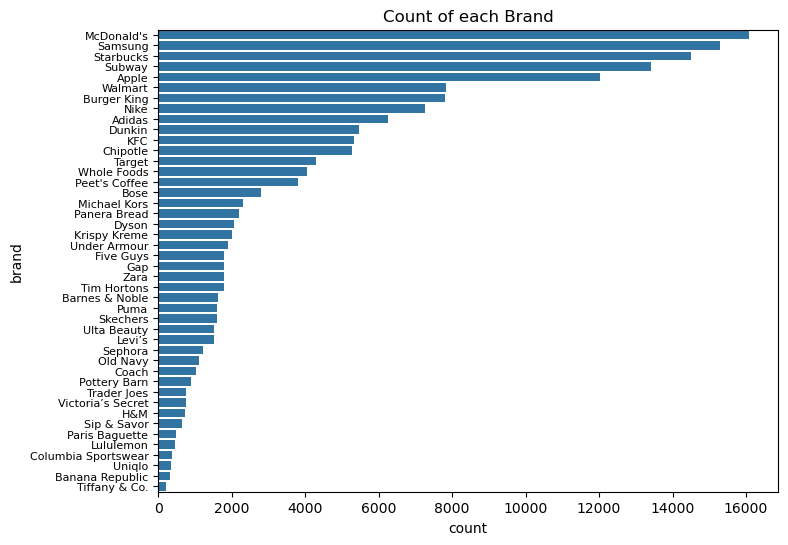

In [54]:
# # Value counts by brand
# print("\n** Brand Distribution **")
# print(brands['brand'].value_counts())

# Plot: Count of each brand
plt.figure(figsize=(8,6))
sns.countplot(y='brand', data=brands, 
              order=brands['brand'].value_counts().index)
plt.title('Count of each Brand')
plt.yticks(fontsize=8)
plt.show()

In [56]:
# Filter for US locations using lat/lon instead, filter US coordinates (approximate range)
brands_us = brands[(brands['latitude'].between(24.396308, 49.384358)) & 
                   (brands['longitude'].between(-125.0, -66.93457))]

print("✅ Records within the US:", brands_us.shape)

✅ Records within the US: (164345, 8)


In [58]:
# Value counts by brand
print("\n** Brand Distribution **")
print(brands_us['brand'].value_counts())


** Brand Distribution **
brand
McDonald's             15872
Samsung                15036
Starbucks              14380
Subway                 13327
Apple                  11794
Walmart                 7767
Burger King             7750
Nike                    7188
Adidas                  6175
Dunkin                  5463
KFC                     5278
Chipotle                5134
Target                  4284
Whole Foods             3930
Peet's Coffee           3813
Bose                    2746
Michael Kors            2284
Panera Bread            2200
Dyson                   2030
Krispy Kreme            2018
Under Armour            1845
Five Guys               1789
Zara                    1776
Gap                     1761
Tim Hortons             1656
Barnes & Noble          1620
Puma                    1603
Skechers                1579
Ulta Beauty             1506
Levi’s                  1477
Sephora                 1204
Old Navy                1094
Coach                   1017
Pottery Bar

In [60]:
brands_us['brand'].nunique()

44

#### Cities of interest

In [63]:
# # Define the cities of interest
# selected_cities = [
#     "Chicago", "New York", "New Jersey", "San Francisco", "Los Angeles", 
#     "San Jose", "Seattle", "Dallas", "Miami", "Boston", "Washington DC", 
#     "Denver", "Salt Lake City", "Las Vegas", "Phoenix"
# ]

# # Function to check if an address contains any selected city
# def extract_city(address):
#     for city in selected_cities:
#         if city.lower() in address.lower():
#             return city
#     return None  # If no match, return None

# # Apply function to create a new 'city' column
# brands_us["city"] = brands_us["address"].apply(extract_city)

# # Filter only records with selected cities
# brands_filtered = brands_us.dropna(subset=["city"])

# print("✅ Records in Selected Cities:", brands_filtered.shape)


        brand   category
8   Starbucks  Starbucks
9   Starbucks  Starbucks
10  Starbucks  Starbucks
11  Starbucks  Starbucks
12  Starbucks  Starbucks


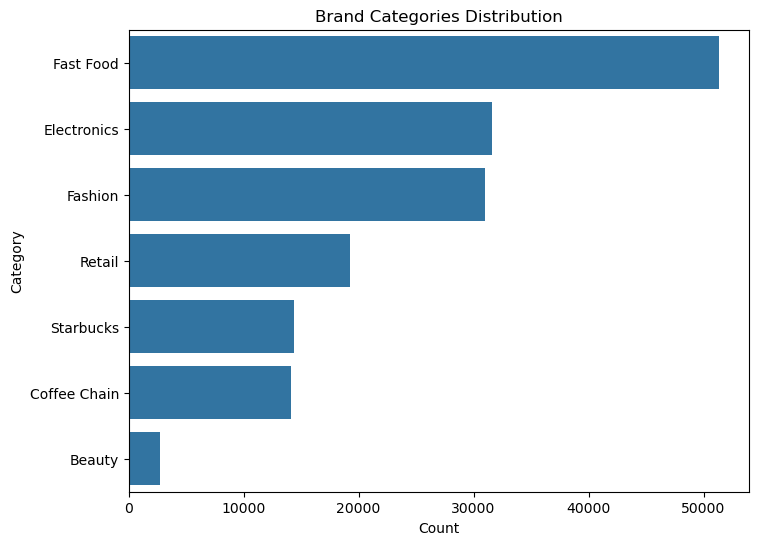

In [71]:
# Define brand category mapping
brand_categories = {

    "Starbucks": "Starbucks",
    
    # Coffee Chains
    "Dunkin": "Coffee Chain",
    "Peet's Coffee": "Coffee Chain",
    "Tim Hortons": "Coffee Chain",
    "Krispy Kreme": "Coffee Chain",
    "Sip & Savor": "Coffee Chain",
    "Paris Baguette": "Coffee Chain",

    # Fast Food
    "McDonald's": "Fast Food",
    "Subway": "Fast Food",
    "Burger King": "Fast Food",
    "KFC": "Fast Food",
    "Chipotle": "Fast Food",
    "Five Guys": "Fast Food",
    "Panera Bread": "Fast Food",

    # Retail
    "Walmart": "Retail",
    "Target": "Retail",
    "Whole Foods": "Retail",
    "Trader Joes": "Retail",
    "Barnes & Noble": "Retail",
    "Pottery Barn": "Retail",

    # Fashion
    "Nike": "Fashion",
    "Adidas": "Fashion",
    "Puma": "Fashion",
    "Skechers": "Fashion",
    "Under Armour": "Fashion",
    "Levi’s": "Fashion",
    "Gap": "Fashion",
    "Zara": "Fashion",
    "H&M": "Fashion",
    "Uniqlo": "Fashion",
    "Banana Republic": "Fashion",
    "Victoria’s Secret": "Fashion",
    "Tiffany & Co.": "Fashion",
    "Coach": "Fashion",
    "Michael Kors": "Fashion",
    "Lululemon": "Fashion",
    "Columbia Sportswear": "Fashion",
    "Old Navy": "Fashion",

    # Beauty
    "Sephora": "Beauty",
    "Ulta Beauty": "Beauty",

    # Electronics
    "Apple": "Electronics",
    "Samsung": "Electronics",
    "Bose": "Electronics",
    "Dyson": "Electronics",

}

# Create the 'category' column using the mapping
brands_us['category'] = brands_us['brand'].map(brand_categories)

# # Fill missing categories with 'Other'
# brands['category'].fillna("Other", inplace=True)

# Display the updated dataset
print(brands_us[['brand', 'category']].head())

plt.figure(figsize=(8,6))
sns.countplot(y=brands_us['category'], order=brands_us['category'].value_counts().index)
plt.title('Brand Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


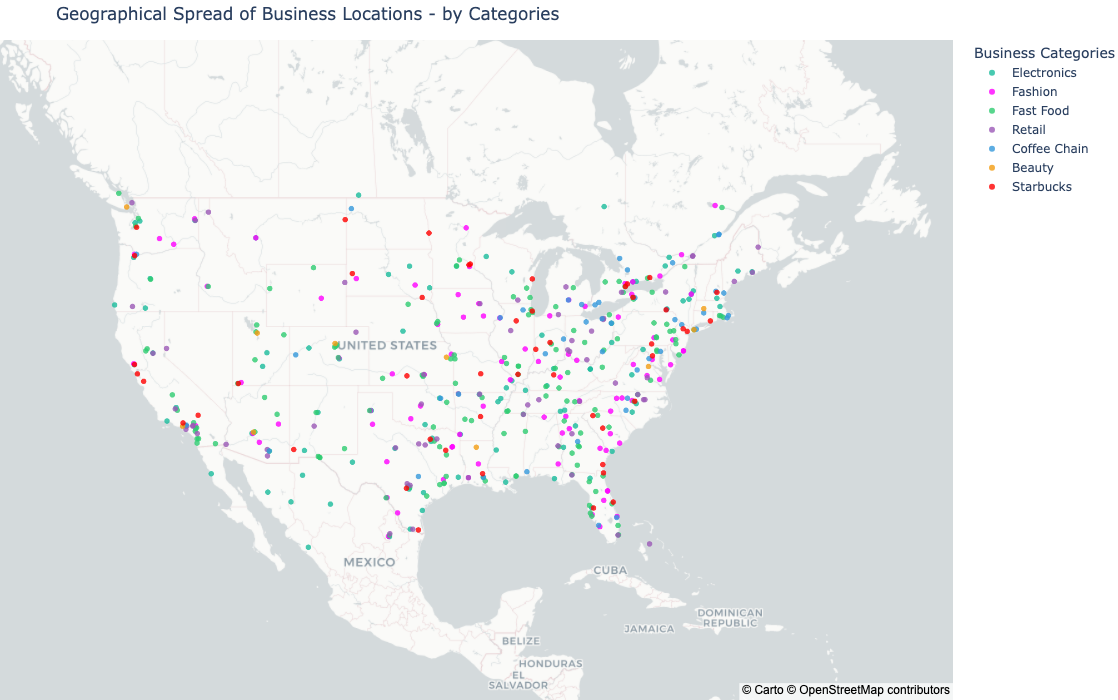

In [130]:
# Visualisation with Starbucks

import plotly.express as px

# Define a custom color mapping for categories
category_colors = {
    "Starbucks": "red",  # Bright Red-Orange
    "Coffee Chain": "#3498DB",  # Blue
    "Fast Food": "#2ECC71",  # Green
    "Retail": "#9B59B6",  # Purple
    "Fashion": "magenta",  # Red
    "Beauty": "#F39C12",  # Orange-Yellow
    "Electronics": "#1ABC9C",  # Teal
}

# Create an interactive scatter plot with Plotly
fig = px.scatter_mapbox(
    brands_us.sample(500), 
    lat="latitude", 
    lon="longitude", 
    color="category",  
    color_discrete_map=category_colors,  # Use custom color mapping
    size_max=12,  # Slightly larger points for better visualization
    opacity=0.8,  # Increase visibility
    hover_name="brand",  
    hover_data=["address", "rating", "user_ratings_total"],
    title="Geographical Spread of Business Locations - by Categories",
    zoom=2,  
    height=700  # Increase height for better clarity
)

# Use a Mapbox basemap
fig.update_layout(
    mapbox_style="carto-positron",  # Clean, professional look
    mapbox_zoom=3,  
    mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},  
    legend_title_text="Business Categories",
    margin={"r":0, "t":40, "l":0, "b":0}  # Remove excess margins
)

fig.show()


#### CLUSTERING

In [81]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Select relevant features for clustering
features = ['latitude', 'longitude', 'rating', 'user_ratings_total', 'category']

# Drop missing values (if any)
brands_cluster = brands_us[features].dropna().reset_index(drop=True)

# One-Hot Encode the 'category' column
encoder = OneHotEncoder(sparse_output=False)  # Keep all categories
category_encoded = encoder.fit_transform(brands_cluster[['category']])

# Convert to DataFrame
category_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['category']))

# Merge one-hot encoded data with numeric features
brands_cluster = pd.concat([brands_cluster.drop(columns=['category']).reset_index(drop=True), 
                            category_df.reset_index(drop=True)], axis=1)

# Standardize only numerical features (excluding latitude & longitude)
scaler = StandardScaler()
columns_to_scale = ['rating', 'user_ratings_total'] + list(category_df.columns)

brands_scaled = brands_cluster.copy()  # Preserve original lat/long
brands_scaled[columns_to_scale] = scaler.fit_transform(brands_scaled[columns_to_scale])

# **Keep latitude & longitude in original form**
print("Data Ready for Clustering. Shape:", brands_scaled.shape)


✅ Data Ready for Clustering. Shape: (164345, 11)


In [124]:
# brands_cluster

In [126]:
# brands_scaled

#### K-Means Clustering (included for reference - NOT USED) 
* must be spherical shaped clusters
* must predefine k - number of clusters
* no outliers
* does not work with geospatial data because sensitive to scale and distance distortions

In [96]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Determine optimal k using Elbow Method
# inertia = []
# k_values = range(1, 11)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(brands_scaled)  # Excluding latitude & longitude from scaling was done earlier
#     inertia.append(kmeans.inertia_)

# # Plot Elbow Curve
# plt.figure(figsize=(6,4))
# plt.plot(k_values, inertia, marker='o', linestyle='-')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()



In [98]:
# # Apply K-Means Clustering
# optimal_k = 4

# # Run K-Means
# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# brands_cluster['kmeans_cluster'] = kmeans.fit_predict(brands_scaled)

# # Check cluster distribution
# print("K-Means Cluster Distribution:")
# print(brands_cluster['kmeans_cluster'].value_counts())


In [100]:
# # Visualization

# import plotly.express as px

# # Restore the 'category' column by extracting the original category names
# category_columns = [col for col in brands_cluster.columns if col.startswith("category_")]

# # Find the category with the highest value (i.e., the original category)
# brands_cluster['category'] = brands_cluster[category_columns].idxmax(axis=1).str.replace("category_", "")

# # Define a custom color mapping for distinct K-Means clusters
# kmeans_colors = {
#     0: "#FF5733",  # Red-Orange
#     1: "#3498DB",  # Blue
#     2: "#2ECC71",  # Green
#     3: "#9B59B6",  # Purple
# }


# fig = px.scatter_mapbox(
#     brands_cluster.sample(500), 
#     lat="latitude", 
#     lon="longitude", 
#     color="kmeans_cluster",  # Color by K-Means cluster
#     color_discrete_map=kmeans_colors,  # Assign distinct colors
#     size_max=10,
#     opacity=0.7,
#     hover_name="category",
#     hover_data=["rating", "user_ratings_total"],
#     title="K-Means Clustering of Business Locations",
#     zoom=5,  
#     height=700
# )

# fig.update_layout(
#     mapbox_style="carto-positron",
#     mapbox_zoom=4,
#     mapbox_center={"lat": brands_cluster["latitude"].mean(), "lon": brands_cluster["longitude"].mean()},
#     legend_title_text="K-Means Clusters",
#     legend=dict(
#         title="Cluster ID",  # Rename legend title
#         font=dict(size=12),  # Adjust legend font size
#         traceorder="normal"
#     )
# )

# fig.show()


#### DBSCAN Clustering
* arbitrary/irregular shape
* no need to predefine k - number of clusters
* can have outliers
* works well with geospatial data - good for clustering store locations

**Optimal 'eps'** 

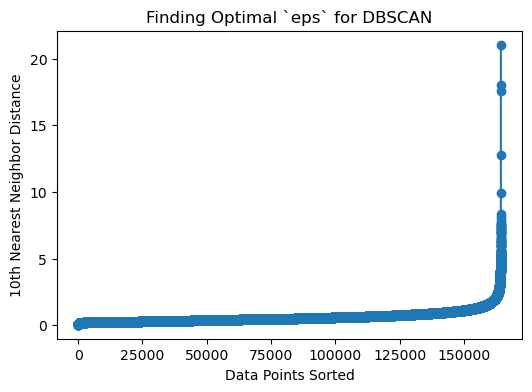

In [108]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit Nearest Neighbors model
nn = NearestNeighbors(n_neighbors=10)
nn.fit(brands_scaled)  # Excluding lat/lon if scaled

# Compute distances to the 10th nearest neighbor
distances, indices = nn.kneighbors(brands_scaled)

# Plot sorted distances (Elbow Method)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(np.sort(distances[:, 9]), marker="o")
plt.xlabel("Data Points Sorted")
plt.ylabel("10th Nearest Neighbor Distance")
plt.title("Finding Optimal `eps` for DBSCAN")
plt.show()


**Apply DBSCAN**

In [111]:
from sklearn.cluster import DBSCAN

# Run DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=8)  # Adjust eps & min_samples as needed
brands_cluster['dbscan_cluster'] = dbscan.fit_predict(brands_scaled)

# Check cluster distribution
print("✅ DBSCAN Cluster Distribution:")
print(brands_cluster['dbscan_cluster'].value_counts())  # -1 represents noise points (outliers)


✅ DBSCAN Cluster Distribution:
dbscan_cluster
 6      37612
 392    19296
-1      19125
 391    18819
 330     5088
        ...  
 682        5
 691        5
 195        4
 65         4
 582        2
Name: count, Length: 695, dtype: int64


In [115]:
brands_cluster.head()

,latitude,longitude,rating,user_ratings_total,category_Beauty,category_Coffee Chain,category_Electronics,category_Fashion,category_Fast Food,category_Retail,category_Starbucks,category,kmeans_cluster,dbscan_cluster
0,24.766957,-107.469908,4.3,215.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Starbucks,3,0
1,24.787826,-107.442951,4.5,759.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Starbucks,3,0
2,24.815533,-107.399265,4.5,1433.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Starbucks,3,0
3,24.822610,-107.369320,4.5,600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Starbucks,3,0
4,24.794470,-107.393553,4.5,1160.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Starbucks,3,0


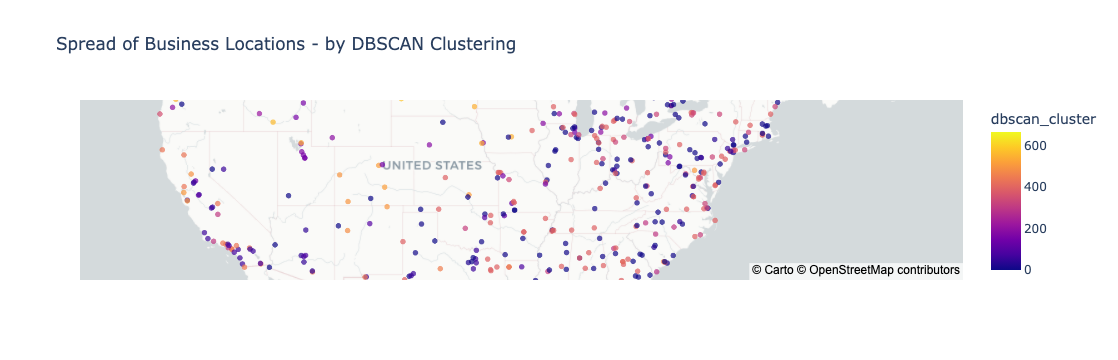

In [138]:
# Visualisation

import plotly.express as px

# Restore the 'category' column by extracting the original category names
category_columns = [col for col in brands_cluster.columns if col.startswith("category_")]

# Find the category with the highest value (i.e., the original category)
brands_cluster['category'] = brands_cluster[category_columns].idxmax(axis=1).str.replace("category_", "")

# Create an interactive scatter plot with Plotly
fig = px.scatter_mapbox(
    brands_cluster.sample(500), 
    lat="latitude", 
    lon="longitude", 
    color="dbscan_cluster",  # Color by DBSCAN cluster
    size_max=10,
    opacity=0.7,
    hover_name="category",  # Now works correctly!
    hover_data=["rating", "user_ratings_total"],
    title="Spread of Business Locations - by DBSCAN Clustering",
    zoom=2,  
    height=700
)

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},
    legend_title_text="DBSCAN Clusters"
)

fig.show()


**DBSCAN Centroid**

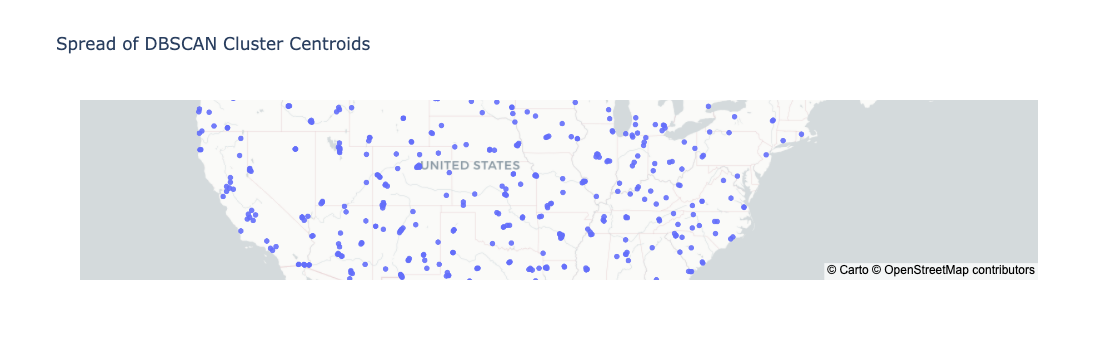

In [142]:
import plotly.express as px

# Remove noise points (-1)
clusters_only = brands_cluster[brands_cluster['dbscan_cluster'] != "-1"]

# Compute centroids for each cluster
centroids = clusters_only.groupby('dbscan_cluster')[['latitude', 'longitude']].mean().reset_index()

# Convert cluster IDs to strings
centroids['dbscan_cluster'] = centroids['dbscan_cluster'].astype(str)

# Plot only centroids
fig = px.scatter_mapbox(
    centroids, 
    lat="latitude", 
    lon="longitude", 
    # color="dbscan_cluster",  # Assign distinct colors to clusters
    size_max=15,
    opacity=0.9,
    hover_name="dbscan_cluster",
    title="Spread of DBSCAN Cluster Centroids",
    zoom=2,  
    height=700
)

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},
    legend_title_text="DBSCAN Clusters"
)

fig.show()


**Cluster Summary**

In [144]:
# Restore the brand Column
if "brand" not in brands_cluster.columns:
    brands_cluster["brand"] = brands_us["brand"]  # Restore from the original dataset
    print("✅ Restored 'brand' column!")


✅ Restored 'brand' column!


In [148]:
# brands_us

In [146]:
# brands_cluster

In [174]:
# Remove noise points (-1) before summarizing
clusters_only = brands_cluster[brands_cluster['dbscan_cluster'] != -1]

# Summarize DBSCAN Clusters
dbscan_summary = clusters_only.groupby("dbscan_cluster").agg(
    avg_rating=("rating", "mean"),
    avg_reviews=("user_ratings_total", "mean"),
    total_locations=("brand", "count"),
    top_brand=("brand", lambda x: x.value_counts().idxmax())  # Most common brand in the cluster
).reset_index()

print("DBSCAN Cluster Summary:")
dbscan_summary


DBSCAN Cluster Summary:


,dbscan_cluster,avg_rating,avg_reviews,total_locations,top_brand
0,0,4.454545,732.818182,3,Walmart
1,1,4.093333,1005.400000,3,Starbucks
2,2,4.290000,334.750000,20,Chipotle
3,3,4.305263,335.105263,15,Starbucks
4,4,4.407018,982.859649,57,Starbucks
...,...,...,...,...,...
689,689,4.054545,4145.000000,11,Samsung
690,690,3.825000,3501.375000,8,Dyson
691,691,4.120000,361.800000,5,Nike
692,692,4.360000,373.600000,10,Zara


**Cluster Summary + Number of Starbucks in each cluster**

In [176]:
# Count how many Starbucks locations exist in each DBSCAN cluster
starbucks_per_cluster = clusters_only[clusters_only['brand'] == "Starbucks"].groupby("dbscan_cluster").size().rename("starbucks_count")

# Merge with DBSCAN Summary (Ensuring No Duplicate Columns)
dbscan_summary = dbscan_summary.drop(columns=["starbucks_count"], errors="ignore")  # Drop old column if it exists
dbscan_summary = dbscan_summary.merge(starbucks_per_cluster, on="dbscan_cluster", how="left").fillna(0)

print("✓ Updated DBSCAN Cluster Summary with Starbucks Presence:")
dbscan_summary

✓ Updated DBSCAN Cluster Summary with Starbucks Presence:


,dbscan_cluster,avg_rating,avg_reviews,total_locations,top_brand,starbucks_count
0,0,4.454545,732.818182,3,Walmart,1.0
1,1,4.093333,1005.400000,3,Starbucks,2.0
2,2,4.290000,334.750000,20,Chipotle,3.0
3,3,4.305263,335.105263,15,Starbucks,5.0
4,4,4.407018,982.859649,57,Starbucks,36.0
...,...,...,...,...,...,...
689,689,4.054545,4145.000000,11,Samsung,0.0
690,690,3.825000,3501.375000,8,Dyson,0.0
691,691,4.120000,361.800000,5,Nike,0.0
692,692,4.360000,373.600000,10,Zara,0.0


**Cluster Summary + Centroid Locations**

In [178]:
# Remove any duplicate latitude/longitude columns before merging
dbscan_summary = dbscan_summary.drop(columns=['latitude_x', 'longitude_x', 'latitude_y', 'longitude_y',
                                              'latitude', 'longitude'], errors='ignore')


In [180]:
# Compute centroids for each cluster (excluding noise)
cluster_centroids = clusters_only.groupby('dbscan_cluster')[['latitude', 'longitude']].mean().reset_index()

# Merge centroids with dbscan_summary
dbscan_summary = dbscan_summary.merge(cluster_centroids, on="dbscan_cluster", how="left")

# Rename latitude and longitude columns to centroid_lat and centroid_long
dbscan_summary.rename(columns={'latitude': 'centroid_latitude', 'longitude': 'centroid_longitude'}, inplace=True)

print("✓ Fixed: DBSCAN Cluster Summary Now Contains Only One Set of Latitude & Longitude!")
dbscan_summary


✓ Fixed: DBSCAN Cluster Summary Now Contains Only One Set of Latitude & Longitude!


,dbscan_cluster,avg_rating,avg_reviews,total_locations,top_brand,starbucks_count,centroid_latitude,centroid_longitude
0,0,4.454545,732.818182,3,Walmart,1.0,24.799153,-107.417899
1,1,4.093333,1005.400000,3,Starbucks,2.0,24.802427,-107.406052
2,2,4.290000,334.750000,20,Chipotle,3.0,24.795461,-107.419238
3,3,4.305263,335.105263,15,Starbucks,5.0,24.591759,-81.659383
4,4,4.407018,982.859649,57,Starbucks,36.0,25.662918,-100.378953
...,...,...,...,...,...,...,...,...
689,689,4.054545,4145.000000,11,Samsung,0.0,41.810493,-71.305905
690,690,3.825000,3501.375000,8,Dyson,0.0,42.723314,-73.800025
691,691,4.120000,361.800000,5,Nike,0.0,43.253827,-95.411156
692,692,4.360000,373.600000,10,Zara,0.0,44.728093,-106.958617


**Identify clusters without starbucks**

In [182]:
# Filter clusters where Starbucks count is 0
clusters_without_starbucks = dbscan_summary[dbscan_summary["starbucks_count"] == 0]

# Print the count
print(f"Total Clusters Without Starbucks: {len(clusters_without_starbucks)}")


Total Clusters Without Starbucks: 444


#### RANK CLUSTERS FOR EXPANSION

**Total Locations** - The number of stores in the cluster. (30% Weight)  
**Average Rating** - Higher-rated clusters indicate better customer satisfaction. (25% Weight)  
**Average Reviews** - More reviews suggest higher customer engagement. (15% Weight)  
**Starbucks Presence** - Clusters without Starbucks could be potential locations for expansion. (30% Weight)  

In [167]:
# Compute Starbucks Absence (1 if no Starbucks, 0 otherwise)
dbscan_summary["starbucks_absence"] = (dbscan_summary["starbucks_count"] == 0).astype(int)

# Compute Expansion Score with updated weights
dbscan_summary["expansion_score"] = (
    (0.3 * dbscan_summary["total_locations"]) +
    (0.25 * dbscan_summary["avg_rating"]) +
    (0.15 * dbscan_summary["avg_reviews"]) +
    (0.3 * dbscan_summary["starbucks_absence"])  # Higher weight for Starbucks absence
)

# Rank clusters in descending order of expansion potential
dbscan_summary = dbscan_summary.sort_values(by="expansion_score", ascending=False)


dbscan_summary

,dbscan_cluster,avg_rating,avg_reviews,total_locations,top_brand,starbucks_count,centroid_latitude,centroid_longitude,starbucks_absence,expansion_score
6,6,3.620868,772.683771,37469,Subway,4668.0,37.398591,-85.097095,0,11357.507783
392,392,4.288656,573.037832,19188,Samsung,0.0,37.769231,-86.358179,1,5843.727839
391,391,4.232239,446.793028,18547,Adidas,0.0,37.510474,-83.203558,1,5632.477014
330,330,3.903341,518.053852,5088,Subway,0.0,41.905356,-77.672606,1,1605.383913
32,32,4.225970,999.225277,4328,McDonald's,312.0,36.961586,-80.890171,0,1449.340284
...,...,...,...,...,...,...,...,...,...,...
118,118,3.630000,99.900000,10,McDonald's,1.0,35.871597,-88.663361,0,18.892500
672,672,4.312500,97.125000,8,Tim Hortons,0.0,47.650321,-69.739547,1,18.346875
174,174,3.133333,90.222222,9,McDonald's,1.0,40.314419,-89.361619,0,17.016667
479,479,3.037500,75.750000,8,Apple,0.0,34.587214,-77.530716,1,14.821875


In [157]:
# import plotly.express as px
# import plotly.graph_objects as go
# from scipy.spatial import ConvexHull

# # Convert DBSCAN cluster labels to strings for coloring
# brands_cluster['dbscan_cluster'] = brands_cluster['dbscan_cluster'].astype(str)

# # Filter out noise points (-1) since we only want clusters
# clusters_only = brands_cluster[brands_cluster['dbscan_cluster'] != "-1"]

# # Create a figure
# fig = go.Figure()

# # Define unique DBSCAN clusters (excluding noise)
# unique_clusters = clusters_only['dbscan_cluster'].unique()

# # Assign a distinct color per cluster
# colors = px.colors.qualitative.Set3[:len(unique_clusters)]

# # Plot each cluster as a convex hull
# for i, cluster in enumerate(unique_clusters):
#     cluster_points = clusters_only[clusters_only['dbscan_cluster'] == cluster]
#     if len(cluster_points) > 2:  # Convex hull requires at least 3 points
#         hull = ConvexHull(cluster_points[['longitude', 'latitude']])
#         hull_points = cluster_points.iloc[hull.vertices]
        
#         fig.add_trace(go.Scattermapbox(
#             lon=hull_points['longitude'].tolist() + [hull_points.iloc[0]['longitude']],  
#             lat=hull_points['latitude'].tolist() + [hull_points.iloc[0]['latitude']],  
#             fill="toself",
#             line=dict(width=2, color=colors[i % len(colors)]),
#             fillcolor=colors[i % len(colors)],
#             opacity=0.3,
#             name=f"Cluster {cluster}"
#         ))

# # Add scatter points for data visualization
# fig.add_trace(px.scatter_mapbox(
#     clusters_only.sample(500), 
#     lat="latitude", 
#     lon="longitude", 
#     color="dbscan_cluster",  
#     size_max=10,
#     opacity=0.7
# ).data[0])

# # Update map layout
# fig.update_layout(
#     mapbox_style="carto-positron",
#     mapbox_zoom=4,
#     mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},
#     title="DBSCAN Cluster Regions (Convex Hulls)",
#     height=700
# )

# fig.show()


#### 2. Coffee Shops Dataset

In [152]:
# Remove any leading or trailing whitespace from each column name
coffee_shops.columns = coffee_shops.columns.str.strip() 

# Initial Inspection
coffee_shops.head()

,name,latitude,longitude,address,place_id,rating,user_ratings_total
0,San Carlos,24.789244,-112.104533,San Carlos,ChIJ4R1FusEFs4YRxnBZeRDueG4,NaN,NaN
1,Magdalena Bay Island Glamping,24.627065,-112.129587,NaN,ChIJy9utFPfjsoYRTkkPZjBrG0o,4.6,22.0
2,Tent camp,24.753924,-112.263141,NaN,ChIJtwIsPwAhs4YRnMY_fTwwL-o,NaN,NaN
3,Бліндаж лапок,24.658488,-112.168009,Corso,ChIJNypRDQDhsoYRqpzLJ7Mnbhk,5.0,3.0
4,I.Hazine,24.786867,-112.286487,NaN,ChIJcQ-7-XMjs4YR6sScGKlMjtU,NaN,NaN


In [268]:
print("✓ COFFEE SHOPS DATASET ✓")

print("\n** Shape: **\n")
print(coffee_shops.shape)

print("\n** Info: **\n")
print(coffee_shops.info())

print("\n** Statistical Description: **\n")
print(coffee_shops.describe())

print("\n** Duplicates: **\n")
print(coffee_shops.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(coffee_shops.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(coffee_shops.isnull().sum() / len(coffee_shops)) * 100

✓ COFFEE SHOPS DATASET ✓

** Shape: **

(163465, 7)

** Info: **

<class 'pandas.core.frame.DataFrame'>
Index: 163465 entries, 0 to 165156
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                163465 non-null  object 
 1   latitude            163465 non-null  float64
 2   longitude           163465 non-null  float64
 3   address             163465 non-null  object 
 4   place_id            163465 non-null  object 
 5   rating              126835 non-null  float64
 6   user_ratings_total  126835 non-null  float64
dtypes: float64(4), object(3)
memory usage: 10.0+ MB
None

** Statistical Description: **

            latitude      longitude         rating  user_ratings_total
count  163465.000000  163465.000000  126835.000000       126835.000000
mean       38.541089     -97.086083       4.231265          379.846998
std         6.745682      14.725120       0.716994         1406.084005
min 

name                   0.000000
latitude               0.000000
longitude              0.000000
address                0.000000
place_id               0.000000
rating                22.408467
user_ratings_total    22.408467
dtype: float64

In [266]:
# Small number of missing values so drop
coffee_shops.dropna(subset=['address'], inplace=True)

In [202]:
# # Count unique values in categorical columns
# coffee_shops_categorical_columns = coffee_shops.select_dtypes(include=['object']).columns
# for col in coffee_shops_categorical_columns:
#     print(f"\nUnique values in {col}:")
#     print(coffee_shops[col].value_counts())
#     print(f"{col}: {coffee_shops[col].nunique()} unique values")

In [198]:
coffee_shops.dtypes

name                   object
latitude              float64
longitude             float64
address                object
place_id               object
rating                float64
user_ratings_total    float64
dtype: object

In [200]:
coffee_shops['name'].nunique()

134480

#### 3. Hotels Dataset

In [156]:
# Remove any leading or trailing whitespace from each column name
hotels.columns = hotels.columns.str.strip() 

# Initial Inspection
hotels.head()

,HotelName,Address,cityName,HotelRating,PinCode,lat,lng
0,Sunbelt Lodge Motel,1903 Veterans Memorial Drive AbbevilleLouisian...,"Abbeville, Louisiana",TwoStar,LA 70510,29.980600,-92.11452
1,Budget Inn & Suites,2115 Charity Street AbbevilleLouisiana 70510,"Abbeville, Louisiana",TwoStar,LA 70510,29.973150,-92.11281
2,Best Western Abbeville Inn & Suites,3515 Veterans Memorial Dr Abbeville AbbevilleL...,"Abbeville, Louisiana",TwoStar,70510,29.967878,-92.08536
3,Motel 6 Abbeville LA,3523 Veterans Memorial Drive AbbevilleLouisian...,"Abbeville, Louisiana",TwoStar,70510,29.968056,-92.08443
4,Days Inn by Wyndham Abbeville,730 Veterans Memorial Dr AbbevilleLouisiana 70...,"Abbeville, Louisiana",TwoStar,70510,29.981226,-92.12469


In [166]:
print("✓ HOTELS DATASET ✓")

print("\n** Shape: **\n")
print(hotels.shape)

print("\n** Info: **\n")
print(hotels.info())

print("\n** Statistical Description: **\n")
print(hotels.describe())

print("\n** Duplicates: **\n")
print(hotels.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(hotels.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(hotels.isnull().sum() / len(hotels)) * 100

✓ HOTELS DATASET ✓

** Shape: **

(139311, 7)

** Info: **

<class 'pandas.core.frame.DataFrame'>
Index: 139311 entries, 0 to 139867
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hotel_name    139311 non-null  object 
 1   address       139311 non-null  object 
 2   city_name     139311 non-null  object 
 3   hotel_rating  139311 non-null  object 
 4   pin_code      139311 non-null  object 
 5   latitude      139311 non-null  float64
 6   longitude     139311 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.5+ MB
None

** Statistical Description: **

            latitude      longitude
count  139311.000000  139311.000000
mean       35.309326     -94.912007
std         6.623045      21.476320
min       -84.403533    -166.551308
25%        30.231775    -107.841130
50%        35.588413     -87.440690
75%        40.198819     -81.446349
max        70.227010     169.198510

** Duplicates: **

0

**

hotel_name      0.0
address         0.0
city_name       0.0
hotel_rating    0.0
pin_code        0.0
latitude        0.0
longitude       0.0
dtype: float64

In [206]:
hotels.dtypes

hotel_name       object
address          object
city_name        object
hotel_rating     object
pin_code         object
latitude        float64
longitude       float64
dtype: object

In [214]:
hotels['hotel_rating'].nunique()

6

In [212]:
# Count unique values in categorical columns
hotels_categorical_columns = hotels.select_dtypes(include=['object']).columns
for col in hotels_categorical_columns:
    print(f"\nUnique values in {col}:")
    print(hotels[col].value_counts())
    print(f"{col}: {hotels[col].nunique()} unique values")


Unique values in hotel_name:
hotel_name
Quality Inn                      428
Rodeway Inn                      320
Econo Lodge                      305
Quality Inn & Suites             257
Comfort Inn & Suites             220
                                ... 
Sierra Bluff Studio                1
White Cloud Retreat Townhouse      1
Columbine 301                      1
River Mtn Lodge W110C              1
Zion Ponderosa Ranch Resort        1
Name: count, Length: 92176, dtype: int64
hotel_name: 92176 unique values

Unique values in address:
address
Various Addresses                                                              231
2737 S Kihei Rd                                                                106
510 Gulf Shore Drive                                                            99
1246 Fulgur St                                                                  98
1870 Ho'one Road                                                                81
                             

In [160]:
# Rename columns for consistency
hotels.rename(columns={"HotelName": "hotel_name"}, inplace=True)
hotels.rename(columns={"cityName": "city_name"}, inplace=True)
hotels.rename(columns={"HotelRating": "hotel_rating"}, inplace=True)
hotels.rename(columns={"PinCode": "pin_code"}, inplace=True)
hotels.rename(columns={"lat": "latitude"}, inplace=True)
hotels.rename(columns={"lng": "longitude"}, inplace=True)

# Change column names to lowercase
hotels.columns = hotels.columns.str.lower()

In [162]:
# Drop duplicates
hotels.drop_duplicates(inplace=True)

In [164]:
# Small number of missing values so drop
hotels.dropna(inplace=True)

#### 4. Restaurants Dataset

In [168]:
# Remove any leading or trailing whitespace from each column name
restaurants.columns = restaurants.columns.str.strip() 

# Initial Inspection
restaurants.head()

,name,latitude,longitude,address,place_id,rating,user_ratings_total
0,Isla Magdalena,24.634444,-112.139444,Puerto Magdalena,ChIJFZ6WEmzjsoYR7rJXMyUVfj0,5.0,1.0
1,Blue Bay Restaurant🍴,24.632167,-112.138309,"B.C.S B.C.S MX, Puerto Magdalena",ChIJjTjCbLnjsoYRcU93RkgkLw0,4.2,5.0
2,Chejo’s Team,24.633820,-112.139023,Unnamed Road,ChIJgXmgzNHjsoYRyazHLFe1IU8,4.9,27.0
3,Magbay Paradise,24.638687,-112.140312,"JVQ5+FVP, Puerto Magdalena",ChIJaRIeLfjjsoYRRjLWG863Wvk,4.8,8.0
4,Cooperativa Escolar,24.785868,-112.107298,"Fondeport, Puerto San Carlos",ChIJy_gHdmgcs4YR7lVw0RHoSwA,4.1,9.0


In [174]:
print("✓ HOTELS DATASET ✓")

print("\n** Shape: **\n")
print(restaurants.shape)

print("\n** Info: **\n")
print(restaurants.info())

print("\n** Statistical Description: **\n")
print(restaurants.describe())

print("\n** Duplicates: **\n")
print(restaurants.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(restaurants.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(restaurants.isnull().sum() / len(restaurants)) * 100

✓ HOTELS DATASET ✓

** Shape: **

(96092, 7)

** Info: **

<class 'pandas.core.frame.DataFrame'>
Index: 96092 entries, 0 to 100331
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                96092 non-null  object 
 1   latitude            96092 non-null  float64
 2   longitude           96092 non-null  float64
 3   address             96092 non-null  object 
 4   place_id            96092 non-null  object 
 5   rating              96092 non-null  float64
 6   user_ratings_total  96092 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.9+ MB
None

** Statistical Description: **

           latitude     longitude        rating  user_ratings_total
count  96092.000000  96092.000000  96092.000000        96092.000000
mean      38.015764    -95.718011      4.201475          721.127721
std        6.457951     14.683818      0.482343         1362.600646
min       24.053788   -125.557998 

name                  0.0
latitude              0.0
longitude             0.0
address               0.0
place_id              0.0
rating                0.0
user_ratings_total    0.0
dtype: float64

In [172]:
# Small number of missing values so drop
restaurants.dropna(inplace=True)